<a href="https://colab.research.google.com/github/joeljoyjj12/NN/blob/main/Tweet_Emotion_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 212 kB 47.5 MB/s 


In [2]:
import tensorflow

In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [4]:
datasets_list=nlp.list_datasets()
print(', '.join(dataset.id for dataset in datasets_list))

acronym_identification, ade_corpus_v2, adversarial_qa, aeslc, afrikaans_ner_corpus, ag_news, ai2_arc, air_dialogue, ajgt_twitter_ar, allegro_reviews, allocine, alt, amazon_polarity, amazon_reviews_multi, amazon_us_reviews, ambig_qa, americas_nli, ami, amttl, anli, app_reviews, aqua_rat, aquamuse, ar_cov19, ar_res_reviews, ar_sarcasm, arabic_billion_words, arabic_pos_dialect, arabic_speech_corpus, arcd, arsentd_lev, art, arxiv_dataset, ascent_kb, aslg_pc12, asnq, asset, assin, assin2, atomic, autshumato, babi_qa, banking77, bbaw_egyptian, bbc_hindi_nli, bc2gm_corpus, beans, best2009, bianet, bible_para, big_patent, billsum, bing_coronavirus_query_set, biomrc, biosses, blbooks, blbooksgenre, blended_skill_talk, blimp, blog_authorship_corpus, bn_hate_speech, bnl_newspapers, bookcorpus, bookcorpusopen, boolq, bprec, break_data, brwac, bsd_ja_en, bswac, c3, c4, cail2018, caner, capes, casino, catalonia_independence, cats_vs_dogs, cawac, cbt, cc100, cc_news, ccaligned_multilingual, cdsc, cdt

In [5]:
dataset=nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [6]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [7]:
train=dataset['train']
test=dataset['test']
val=dataset['validation']

In [8]:
def get_tweet(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets, labels

In [9]:
tweets,labels=get_tweet(train)

In [10]:
tweets[3],labels[3]

('i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'love')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [12]:
print(tokenizer.texts_to_sequences([tweets[0]]))
print(tweets[0])
# -----------------------------------------#
print(tokenizer.texts_to_sequences(["feel"]))
print(tokenizer.texts_to_sequences("feel"))

[[2, 139, 3, 679]]
i didnt feel humiliated
[[3]]
[[1997], [1550], [1550], [8884]]



## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

66
2


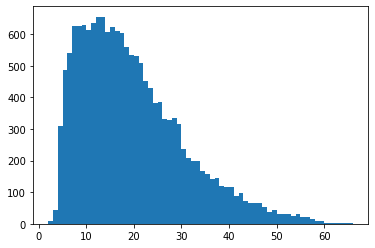

In [13]:
lengths=[len(t.split()) for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))
print(max(lengths))
print(min(lengths))

In [14]:
max_len=50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
def get_sequences_pad(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded_seq=pad_sequences(sequences,maxlen=max_len,padding='post',truncating='post')
  return padded_seq

In [16]:
padded_train_seq=get_sequences_pad(tokenizer,tweets)

In [17]:
print(padded_train_seq[1])
print(tweets[1])

[   2   40  101   60    8   15  494    5   15 3496  553   32   60   61
  128  148   76 1480    4   22 1255    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake


## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [18]:
classes=set(labels)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

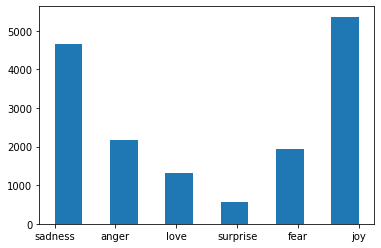

In [19]:
plt.hist(labels,bins=2*len(classes)-1)
plt.show()

In [38]:
class_index= dict((v,c) for c,v in enumerate(classes))
index_class= dict((c,v) for c,v in enumerate(classes))
print(class_index)
print(index_class)
type(class_index)

{'fear': 0, 'sadness': 1, 'love': 2, 'surprise': 3, 'joy': 4, 'anger': 5}
{0: 'fear', 1: 'sadness', 2: 'love', 3: 'surprise', 4: 'joy', 5: 'anger'}


dict

In [21]:
name_to_ids = lambda labels :np.array([class_index[x] for x in labels])

In [22]:
train_labels=name_to_ids(labels)
print(train_labels[:4])
print(labels[:4])

[1 1 5 2]
['sadness', 'sadness', 'anger', 'love']


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [23]:
from tensorflow.keras import layers,models

model=models.Sequential([
    layers.Embedding(10000,16,input_length=max_len),
    layers.Bidirectional(layers.LSTM(20,return_sequences=True)),
    layers.Bidirectional(layers.LSTM(20)),
    layers.Dense(6,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [25]:
val_tweets,val_labels=get_tweet(val)
padded_val_sequences=get_sequences_pad(tokenizer,val_tweets)
val_labels=name_to_ids(val_labels)

In [26]:
print(val_tweets[4])
print(val_labels[4])

i can have for a treat or if i am feeling festive
4


In [27]:
from gc import callbacks
h = model.fit(padded_train_seq,train_labels,validation_data=(padded_val_sequences,val_labels),epochs=20,
              callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)])

Epoch 1/20
500/500 [==============================] - 40s 62ms/step - loss: 1.3508 - accuracy: 0.4239 - val_loss: 0.9750 - val_accuracy: 0.6365
Epoch 2/20
500/500 [==============================] - 29s 58ms/step - loss: 0.6789 - accuracy: 0.7407 - val_loss: 0.6238 - val_accuracy: 0.7975
Epoch 3/20
500/500 [==============================] - 29s 58ms/step - loss: 0.3566 - accuracy: 0.8871 - val_loss: 0.4750 - val_accuracy: 0.8405
Epoch 4/20
500/500 [==============================] - 29s 59ms/step - loss: 0.2153 - accuracy: 0.9328 - val_loss: 0.4164 - val_accuracy: 0.8675
Epoch 5/20
500/500 [==============================] - 29s 58ms/step - loss: 0.1517 - accuracy: 0.9523 - val_loss: 0.3882 - val_accuracy: 0.8765
Epoch 6/20
500/500 [==============================] - 29s 58ms/step - loss: 0.1173 - accuracy: 0.9630 - val_loss: 0.4126 - val_accuracy: 0.8790
Epoch 7/20
500/500 [==============================] - 29s 58ms/step - loss: 0.0930 - accuracy: 0.9702 - val_loss: 0.4105 - val_accuracy:

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

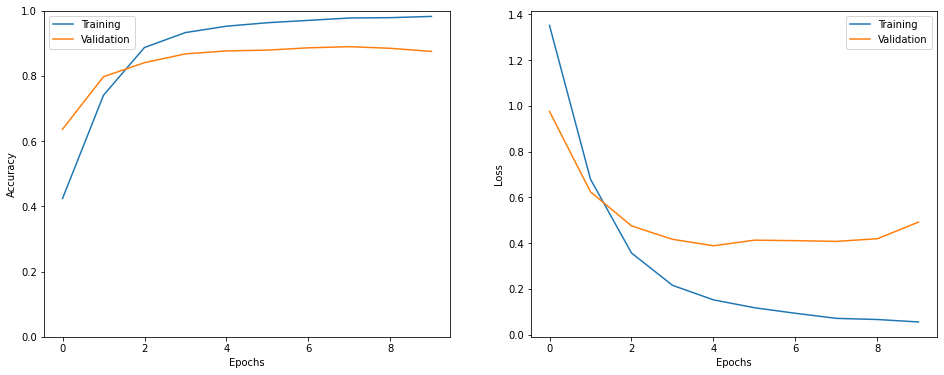

In [28]:
show_history(h)

In [29]:
test_tweets,test_labels=get_tweet(test)
padded_test_sequences=get_sequences_pad(tokenizer,test_tweets)
test_labels=name_to_ids(test_labels)

In [30]:
model.evaluate(padded_test_sequences,test_labels)

63/63 [==============================] - 1s 19ms/step - loss: 0.4736 - accuracy: 0.8735


[0.4736408591270447, 0.8734999895095825]

In [48]:
# Predicting
i=np.random.randint(0,len(test_labels)-1)
print(f'Sentence : {test_tweets[i]}')
print(f'Real emotion : {index_class[test_labels[i]]}')
pred=model.predict(np.array([padded_test_sequences[i]]))
predicted_emotion=index_class[np.argmax(pred)]

print(f'Predicted Emotion : {predicted_emotion}')

Sentence : i wont lie this week has been abit of a difficult week for me ive been feeling very stressed and anxious this week plus i think im coming down with the flu but it has definately helped me to appreciate the little things
Real emotion : anger
Predicted Emotion : fear


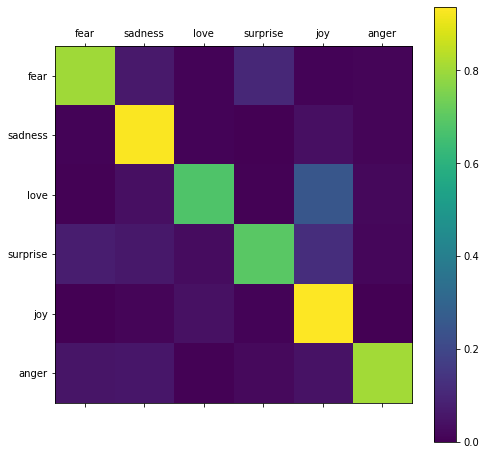

In [57]:
# Plotting
preds=model.predict(padded_test_sequences)
preds=np.argmax(preds,axis=-1)

show_confusion_matrix(test_labels, preds,list(classes))